# Titanic dataset analysis

### We are going to analyse the dataset using EDA and to build the Logistic Regression Model

The dataset includes the column 'Survived', which is our target.

In [48]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Basic data exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data pre-processing

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
# Impute missing values for 'Age' with the median

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])


In [54]:
# For the 'Embarked', the missing values are replaced with the most common values

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode,inplace=True)

In [55]:
# Remove'Ticket'

df=df.drop('Ticket', axis=1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [57]:
# Drop 'Cabin'

df.drop(columns=['Cabin'], inplace=True)

In [58]:
# Amend family size adding to parch one person

df['FamilySize'] = df['SibSp'] = df['Parch'] + 1

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


C:\Users\mvale\AppData\Local\Temp\ipykernel_31504\3186858664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df,palette='muted',split=True, ax=axes[0,0])


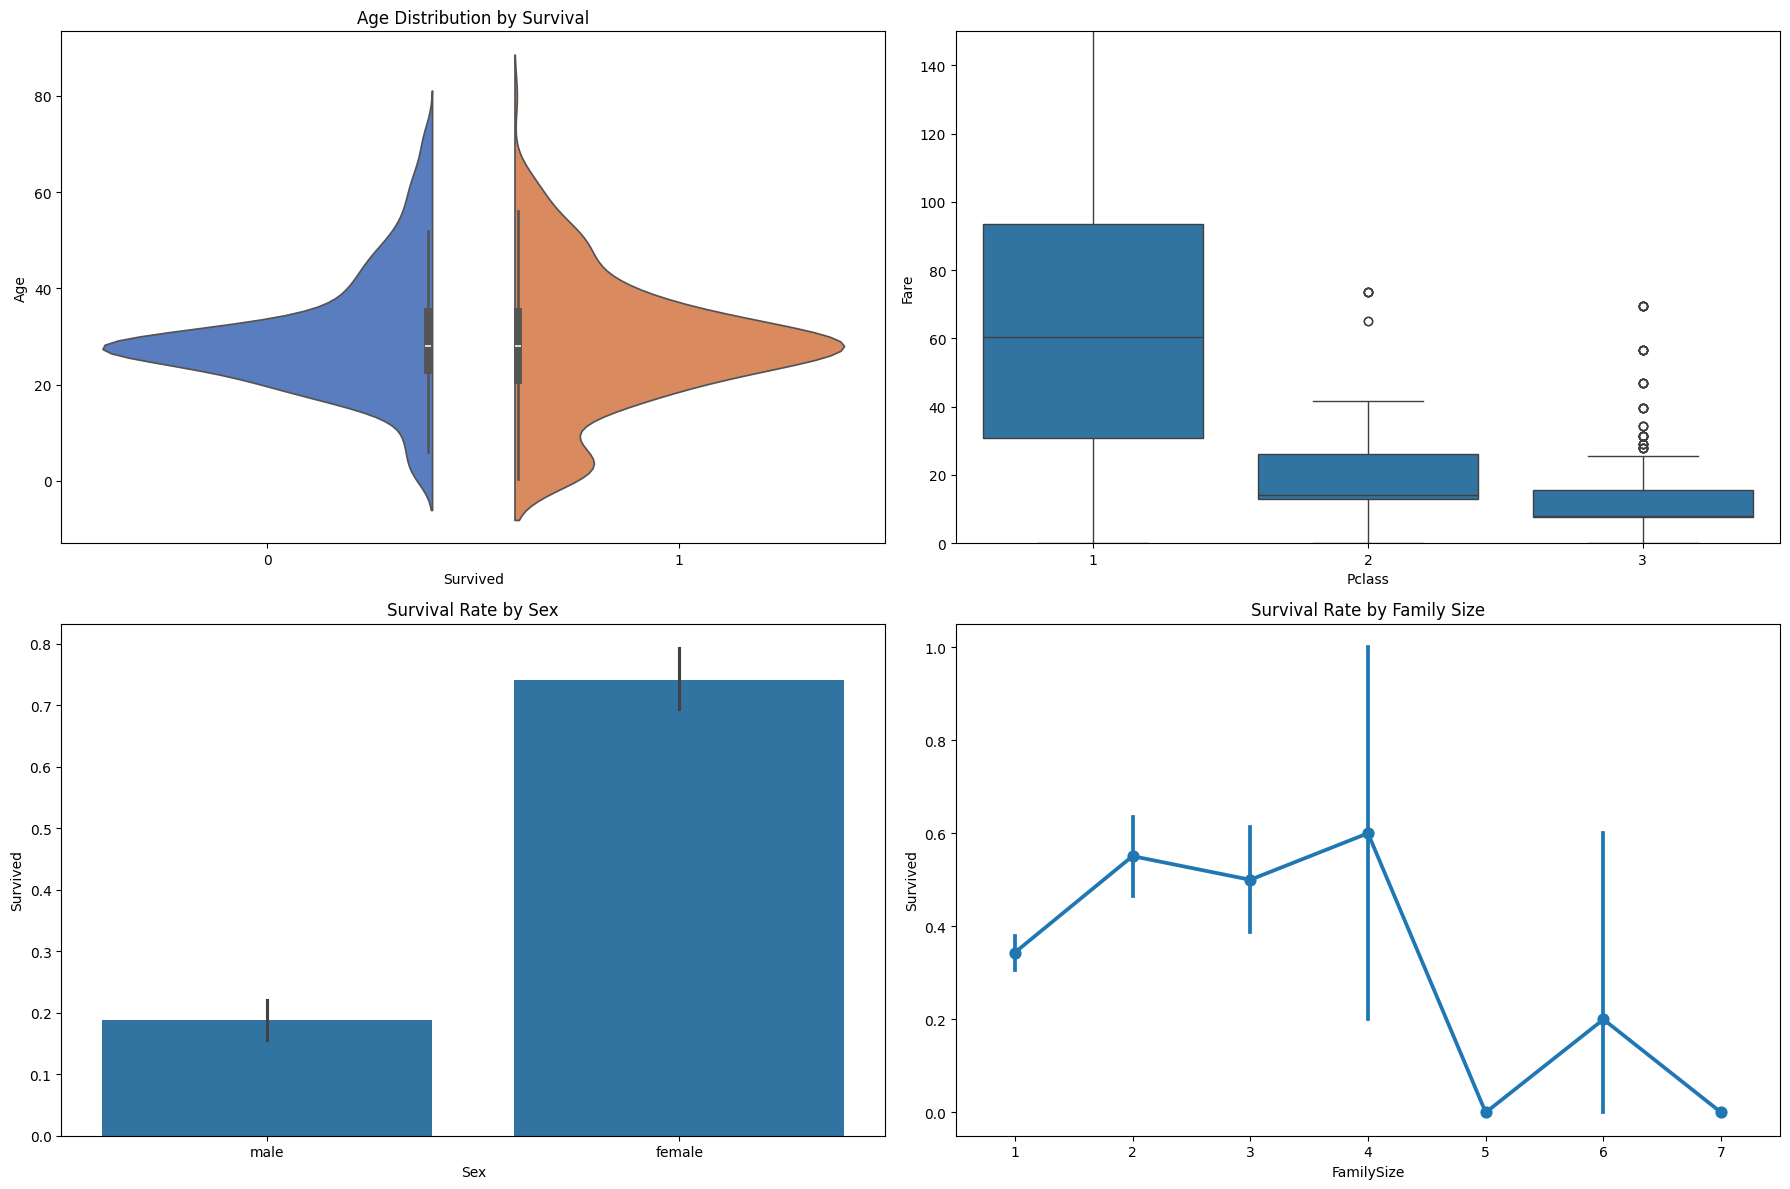

In [60]:
fig, axes = plt.subplots(2,2,figsize=(18,12))

sns.violinplot(x='Survived', y='Age', data=df,palette='muted',split=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Survival')

sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[0,1])
axes[0,1].set_ylim(0,150)

sns.barplot(x='Sex',y='Survived', data=df, ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Sex')

sns.pointplot(x='FamilySize', y='Survived',data=df,ax=axes[1,1])
axes[1,1].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

### Based on the charts above, the survival rate is higher for Females, for family sizes of 2 to 4, and children's chance to survive was not low as they were the first to disembark.

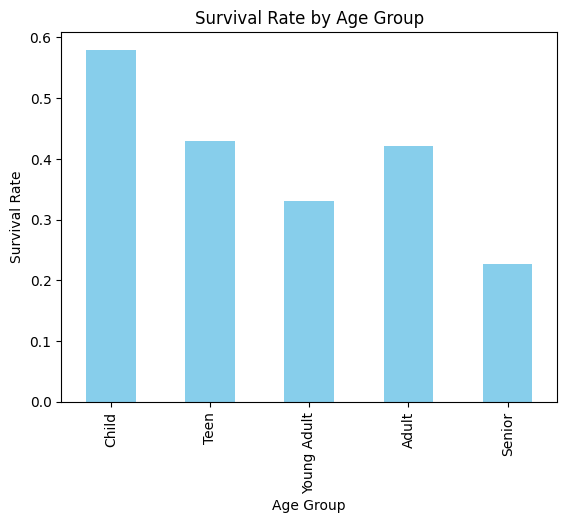

In [61]:
# Plot the survival rate by age group

age_bins=[0,12,18,30,60,100]
age_labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup']=pd.cut(df['Age'],bins=age_bins, labels=age_labels)

age_survival=df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar',color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

### We build our model using age, sex,passenger class, fare, and family size features.

In [65]:
# We replace data to make it suitable for the model

df_d=pd.get_dummies(df['Sex'])
df_d=df_d.astype(int)
df=pd.concat([df,df_d],axis=1)


tdf=df[['Age','Survived','Pclass','female','Fare','FamilySize']]
tdf

,Age,Survived,Pclass,female,female,female,Fare,FamilySize
0,22.0,0,3,0,0,0,7.2500,1
1,38.0,1,1,1,1,1,71.2833,1
2,26.0,1,3,1,1,1,7.9250,1
3,35.0,1,1,1,1,1,53.1000,1
4,35.0,0,3,0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,27.0,0,2,0,0,0,13.0000,1
887,19.0,1,1,1,1,1,30.0000,1
888,28.0,0,3,1,1,1,23.4500,3
889,26.0,1,1,0,0,0,30.0000,1


In [66]:
tdf.shape

(891, 8)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [70]:
X = np.asarray(tdf[['Age','Pclass','female','Fare','FamilySize']])
X[0:5]

array([[22.    ,  3.    ,  0.    ,  0.    ,  0.    ,  7.25  ,  1.    ],
       [38.    ,  1.    ,  1.    ,  1.    ,  1.    , 71.2833,  1.    ],
       [26.    ,  3.    ,  1.    ,  1.    ,  1.    ,  7.925 ,  1.    ],
       [35.    ,  1.    ,  1.    ,  1.    ,  1.    , 53.1   ,  1.    ],
       [35.    ,  3.    ,  0.    ,  0.    ,  0.    ,  8.05  ,  1.    ]])

In [71]:
y = np.asarray(tdf['Survived'])
y [0:5]

array([0, 1, 1, 1, 0], dtype=int64)

### We normalise the dataset

In [72]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.56573646,  0.82737724, -0.73769513, -0.73769513, -0.73769513,
        -0.50244517, -0.47367361],
       [ 0.66386103, -1.56610693,  1.35557354,  1.35557354,  1.35557354,
         0.78684529, -0.47367361],
       [-0.25833709,  0.82737724,  1.35557354,  1.35557354,  1.35557354,
        -0.48885426, -0.47367361],
       [ 0.4333115 , -1.56610693,  1.35557354,  1.35557354,  1.35557354,
         0.42073024, -0.47367361],
       [ 0.4333115 ,  0.82737724, -0.73769513, -0.73769513, -0.73769513,
        -0.48633742, -0.47367361]])

### Train / Test dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


### Modeling - Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [75]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [76]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.77390294, 0.22609706],
       [0.77470927, 0.22529073],
       [0.35623638, 0.64376362],
       [0.20103028, 0.79896972],
       [0.76903242, 0.23096758],
       [0.58479184, 0.41520816],
       [0.21574985, 0.78425015],
       [0.35073999, 0.64926001],
       [0.63984238, 0.36015762],
       [0.75414122, 0.24585878],
       [0.79032889, 0.20967111],
       [0.68820542, 0.31179458],
       [0.25217259, 0.74782741],
       [0.78968702, 0.21031298],
       [0.17907296, 0.82092704],
       [0.6664429 , 0.3335571 ],
       [0.79577293, 0.20422707],
       [0.32349657, 0.67650343],
       [0.76811375, 0.23188625],
       [0.21222101, 0.78777899],
       [0.73363431, 0.26636569],
       [0.79429892, 0.20570108],
       [0.79076002, 0.20923998],
       [0.79040952, 0.20959048],
       [0.25416038, 0.74583962],
       [0.37601308, 0.62398692],
       [0.17639416, 0.82360584],
       [0.14856733, 0.85143267],
       [0.79040952, 0.20959048],
       [0.77942178, 0.22057822],
       [0.

### Evaluation

### jaccard index
Jaccard index shows the similarity of two datasets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
The Jaccard similarity is calculated by dividing the number of observations in both sets by the number of observations in either set.

In [77]:

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7571428571428571

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 39  21]
 [ 13 106]]


Confusion matrix, without normalization
[[ 39  21]
 [ 13 106]]


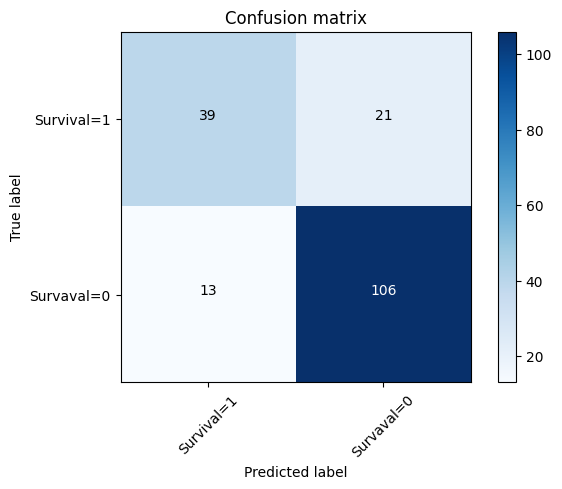

In [79]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survival=1','Survaval=0'],normalize= False,  title='Confusion matrix')

In [80]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       119
           1       0.75      0.65      0.70        60

    accuracy                           0.81       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



### The model provides a relatively good accuracy based on f1-score, precisionand recall for survival.

### Log loss
In logistic regression, the output can be the probability of survival (equals to 1). This probability is a value between 0 and 1.
Log loss( or Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [81]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4558135844960931